# **Spectral gradient method**

Realized by:

*   **IHBACH** Mohamed Yassine
*   **TAHERI** Oumaima
*   **KHOUDRAJI** Wissale

Professors :

**Pr.HABBAL** Abderrahmane $~~$ **Pr.CHKIFA** Abdellah






# **INTRODUCTION**
> *The spectral gradient method is one of the noteworthy methods to deal with large-scale(many variables) problems. Two advantages of this method are that each iteration only needs the computation of the gradient vector and, moreover, the number of algebraic operations is linear in terms of the problem dimension. This method is essentially steepest descent method, where different variants on the effective choices of the steplength along the negative gradient direction introduce different methods. Barzilai and Borwein , using two last iteration information obtained a scalar approximation to the Hessian on the basis of quasi-Newton methods. The numerical result showed that the Barzilai and Borwein (BB) method is superior to the ordinary steepest descent method.
They proved that for the two dimensional convex quadratic, the BB method converges superlinearly to the solution.*







We consider the minimization of a smooth nonlinear objective function,
$$\\
$$
$$ f : {\mathbb R}^N→{\mathbb R},
\\ min ~~f (x)$$
$$\\
$$
where $N$ is the number of variables, which is assumed to be large.
To solve this problem, the spectral gradient method, proposed by Barzilai and Borwein, produces an iterative approach.
$$\\
$$
Barzilai and Borwein presented a two-point step size gradient method,which is called usually the Barzilai-Borwein (or **BB**) gradient method. In the method, the step size is derived from a two-point approximation to the secant equation underlying quasi-Newton methods.
$$\\
$$
Consider the gradient iteration form
$$\\
$$
\begin{equation}
\\
u^{(0)} \textrm{ given }; \quad u^{(k+1)} = u^{(k)} - \rho_k \nabla J(u^{(k)})
\\
\end{equation}
$$\\
$$
which can be written as
$$\\
$$
\begin{equation}
\\
u^{(k+1)} = u^{(k)} - D_k \nabla J(u^{(k)})
\\
\end{equation}
$$\\
$$
Where $ D_k = \rho_k I $. In order to make the matrix $D_k$ have quasi-Newton property, we compute $\rho_k$ such that
$$\\
$$
$$
min ~~\|s_{k-1}-D_ky_{k-1}\|
$$
$$\\
$$
This yields to **BB1** step
$$\\
$$
$$
\rho^1_k = \dfrac{(s^{(k-1)} ,s^{(k-1)})}{(y^{(k-1)} ,s^{(k-1)})}
$$
$$\\
$$
Where
$$\\
$$
$$ \left\{
\begin{array}{ccc}
s^{(k-1)} & = & u^{(k)} - u^{(k-1)} \\
y^{(k-1)} & = & \nabla J(u^{(k)}) - \nabla J(u^{(k-1)}) \\
 \end{array}
\right.
$$
$$\\
$$
we can also minimize $ \| D^{-1}_ks_{k−1}−y_{k−1} \|$ with respect to $ \rho_k $ to get **BB2** step 
$$\\
$$
$$
\rho^2_k = \dfrac{(s^{(k-1)} ,y^{(k-1)})}{(y^{(k-1)} ,y^{(k-1)})}
$$
$$\\
$$



Defining the functions $J1$ , $J2$ , $J5$ , $J6$ and $JR$  
$$J_1(v) = \sum_{i=1}^{i=N}{(v_i - 1)^2}, \quad J_2(v) = \sum_{i=1}^{i=N}{(v_i - i)^2}$$
$$\\
$$
$$
J_5(v) =\frac{1}{2}(Av,v)-(f,v) + \sum_{i=1}^{i=N}{(v_i)^2}, \quad 
J_6(v) =\frac{1}{2}(Av,v)-(f,v) + \sum_{i=1}^{i=N}{(v_i)^4}
$$
$$\\
$$
with $f=(1,\ldots,1)$ and the matrix $A = {\rm tridiag}[-1, 2, -1]$ and Rosenbrock function
$$\\
$$

* Convexity of $J_1$:

The Hessian of $J_1$, $\nabla^{2}J_1(u)=2 I_n$  is positive-definite, then $J_1$ is strongly convex.
 
* Convexity of $J_2$:

Same for  $J_2$, since $\nabla^{2}J_2(u)=2 I_n$ then $J_2$ is strongly convex.
 
* Convexity of $J_5$:

The hessian matrix of $J_5$, $\nabla^{2}J_5(u)=A+2 I_n$ , since $det(A)>0$ and $Tr(A) > 0$ then A is positive-definite, hence $\nabla^{2}J_5$ is positive-definite. Therefore $J_5$ is strongly convex


* Convexity of $J_6$:

The hessian of $J_6$ may be written as:

$\nabla^{2}J_6(u)=A+12M(u)$, with 
$M(u)= \begin{pmatrix}
        u_1^2  & \cdots & 0 \\ 
    \vdots & \ddots & \vdots \\ 
    0      & \cdots & u_N^2 
\end{pmatrix}$.

$\nabla^{2}J_6(u)$ is positive-definite since it's the sum of a positive-definite matrix and a positive matrix. Therefore $J_6$ is strict convex.

The Rosenbrok function:

$$
J_R(v) = \sum_{i=1}^{N-1}(v_{i+1}-v_i^2)^2 + \sum_{i=1}^{N-1} (v_i - 1)^2
$$

$$
G_1 = -4v_1(v_2-v_1^2)+2(v_1-1),
$$

$$
G_i = -4v_i(v_{i+1}-v_i^2)+2(v_i-v_{i-1}^2)+2(v_i-1),\quad \quad i=2,\dots,N-1,
$$

$$
G_N = 2(v_N-v_{N-1}^2)
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
def J1(v):
  v=np.array(v)
  n = len(v)
  f = np.ones(n)
  return [np.dot(v-f,v-f),2*(v-f)]

def J2(v):
  v=np.array(v)
  n = len(v)
  g = np.arange(1,n+1)
  return [np.dot(v-g,v-g),2*(v-g)]

def J5(v):
  N=len(v)
  A= 2*np.eye(N) - np.diagflat(np.ones(N-1),1) - np.diagflat(np.ones(N-1),-1)
  Av=A.dot(v)
  f=np.ones(N)
  J=1/2.*np.dot(Av,v)-np.dot(f,v)+np.dot(v,v)
  G=Av-f+2*v
  return J,G

def J6(v):
  N=len(v)
  A= 2*np.eye(N) - np.diagflat(np.ones(N-1),1) - np.diagflat(np.ones(N-1),-1)
  Av=A.dot(v)
  f=np.ones(N)
  w=np.power(v, 3)
  J=1/2.*np.dot(Av,v)-np.dot(f,v)+np.dot(v,w)
  G=Av-f+4*w
  return J,G

def JR(v):
  v=np.array(v)
  n = len(v)
  #La fonction JR 
  val=0
  for i in range(n-1):
    val += ( v[i+1] - v[i]**2 )**2 + ( v[i] - 1 )**2
  #Le grandient de JR
  grad = []
  for i in range (n):
    if i == 0:
      grad.append(- 4 * v[i] * (v[i+1] - v[i]**2) - 2 * (1 - v[i]))
    elif i == n-1:
      grad.append( 2 * ( v[n-1] - v[i-1]**2 ) )
    else:
      grad.append( 2 * (v[i] - v[i-1]**2) - 4 * v[i] * (v[i+1] - v[i]**2) - 2* (1- v[i]))
  return [val , np.array(grad) ]


def func(v,i):
    if i==1:
        return J1(v)
    elif i==2:
        return J2(v)
    elif i==5:
        return J5(v)
    elif i==6:
        return J6(v)
    elif i=="R":
        return JR(v)
    else :
        print("Undefined function")
        return None
    

---
## **Fixed step algorithm**
---

In [ ]:
def gradient_descent_fixed_step(u0,Kmax,i):
  #eta : fixed step 
  #eps : Tolerance 
  t = time.time()
  eps = 10**-10
  eta = 0.05
  nbr_iteration=0
  f_ui = [func(u0,i)[0] ]
  grad = func(u0,i)[1]
  while np.linalg.norm(grad) > eps and nbr_iteration <= Kmax :
    u0 = u0 - eta * grad
    grad = func(u0,i)[1]
    f_ui.append(func(u0,i)[0])
    nbr_iteration += 1

  run_time = time.time() - t
  return f_ui , u0 , run_time , nbr_iteration
  

---
## **BB1 algorithm :**
---

In [ ]:
def gradient_barzilai_borwein_1(N,i):
  t = time.time()
  eps = 10**-10
  Kmax = 1500
  nbr_iteration = 0
  u0 = np.zeros(N)
  u1 = gradient_descent_fixed_step(u0,1,i)[1]
  f_ui = [ func(u1,i)[0] ]
  grad0 , grad1 = func(u0,i)[1] , func(u1,i)[1]
  while np.linalg.norm(grad1) > eps and nbr_iteration <= Kmax :
    sk_1  = u1 - u0 
    gk_1 = grad1 - grad0
    eta_bb = np.dot(sk_1,sk_1) / np.dot(gk_1,sk_1)
    u0 = u1
    u1 = u0 - grad1 *eta_bb 
    f_ui.append( func(u1,i)[0] )
    grad0 , grad1 = func(u0,i)[1] , func(u1,i)[1]
    nbr_iteration += 1
  
  run_time = time.time() - t

  return [ f_ui ,u1, run_time , nbr_iteration ]

---
## **BB2 algorithm :**
---

In [ ]:
def gradient_barzilai_borwein_2(N,i):
  t = time.time()
  eps = 10**-10
  Kmax = 1500
  nbr_iteration = 0
  u0 = np.zeros(N)
  u1 = gradient_descent_fixed_step(u0,1,i)[1]
  f_ui = [ func(u1,i)[0] ]
  grad0 , grad1 = func(u0,i)[1] , func(u1,i)[1]
  while np.linalg.norm(grad1) > eps and nbr_iteration <= Kmax :
    sk_1  = u1 - u0 
    gk_1 = grad1 - grad0
    eta_bb = np.dot(sk_1,gk_1) / np.dot(gk_1,gk_1)
    u0 = u1
    u1 = u0 - grad1 * eta_bb 
    f_ui.append( func(u1,i)[0] )
    grad0 , grad1 = func(u0,i)[1] , func(u1,i)[1]
    nbr_iteration += 1
  
  run_time = time.time() - t

  return [ f_ui ,u1, run_time , nbr_iteration ]

---
## **Test function**
---

In [ ]:
def test(i,N):
  for n in N:
    f_fixed ,u0_fixed, run_time_fixed , nbr_iter_fixed = gradient_descent_fixed_step(np.zeros(n),1500,i)
    f_BB1 ,u0_BB1, run_time_BB1 , nbr_iter_BB1 = gradient_barzilai_borwein_1(n,i)
    f_BB2 ,u0_BB2, run_time_BB2 , nbr_iter_BB2 = gradient_barzilai_borwein_2(n,i)

    plt.plot(np.arange(nbr_iter_fixed+1),f_fixed,'g.',label="Fixed step ("+str(nbr_iter_fixed)+" iterations | "+str(round(run_time_fixed,4))+" s )")
    plt.plot(np.arange(nbr_iter_BB1+1),f_BB1,'r',label="BB1 ("+str(nbr_iter_BB1)+" iterations | "+str(round(run_time_BB1,4))+" s )")
    plt.plot(np.arange(nbr_iter_BB2+1),f_BB2,'bo',fillstyle='none',label="BB2 ("+str(nbr_iter_BB2)+" iterations | "+str(round(run_time_BB2,4))+" s )")
    
    plt.grid()
    plt.xlabel('iterations')
    plt.ylabel('$f(u_k)$')
    plt.title("Function $J_"+str(i)+"$ ( N = "+str(n)+" )")
    plt.legend()
    plt.show()


---
### Validation test for $J1$ and $J2$ for $N=10$ using BB1 , BB2 and fixed step
---

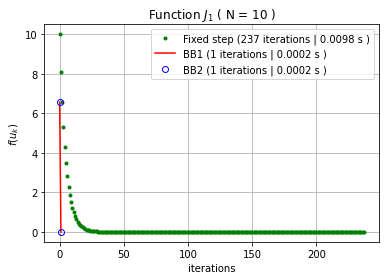

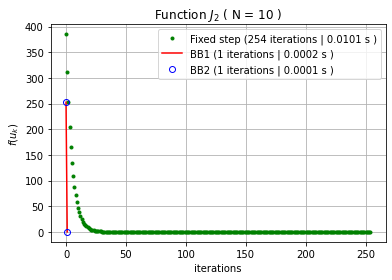

In [ ]:
#Test of Function J1 using BB1, BB2 and fixed step
test(1,[10])
#Test of Function J2 using BB1, BB2 and fixed step
test(2,[10])

---
### Test for $J_5$ using BB1 , BB2 and fixed step for $N = 10 , 20 , 40 , 80$
---

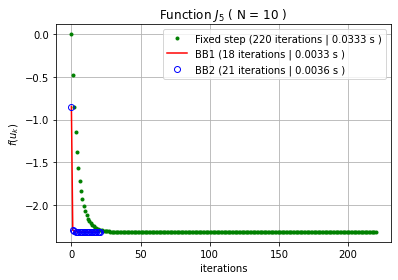

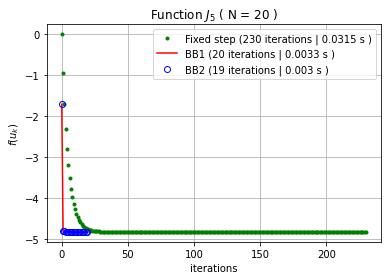

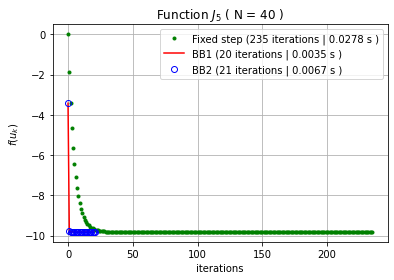

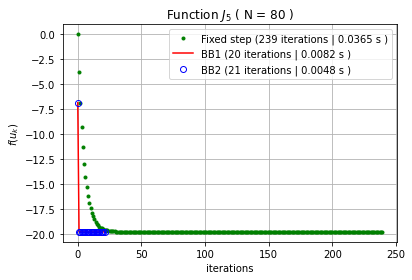

In [ ]:
test(5,[10,20,40,80])

Test for $J_6$ using BB1 , BB2 and fixed step for $N = 10 , 20 , 40 , 80$

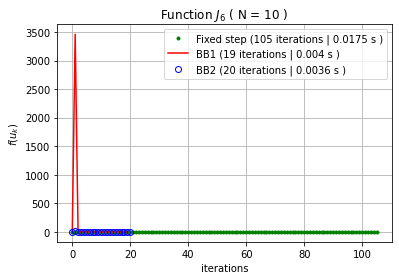

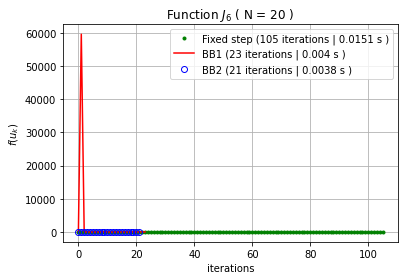

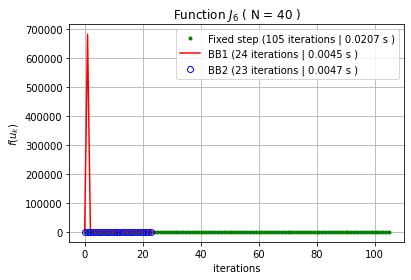

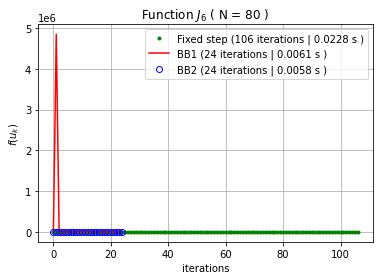

In [ ]:
test(6,[10,20,40,80])

---
### Test of $J_R$ using BB1 and BB2 for $N = 10 , 20 , 40 , 80$
---

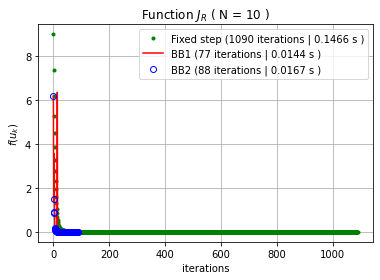

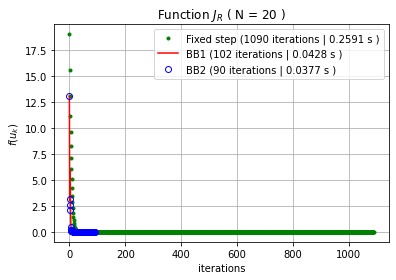

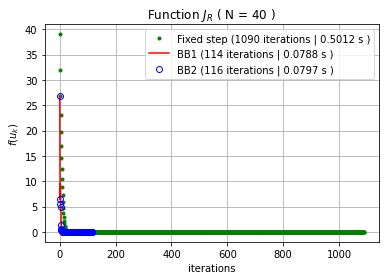

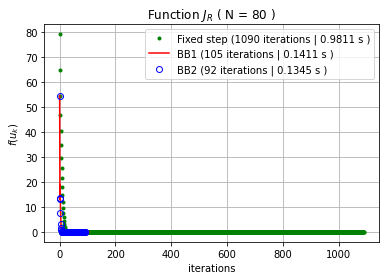

In [ ]:
test("R",[10,20,40,80])

---
---
<font size="4px">The **BB** methods are much faster than standard gradient method for using 2nd-order information (Hessian).
<br><br>
<font size="4px">The **BB** methods often requires less computational work and speed up the convergence greatly which significantly improves the
performance of a standard gradient method.
They converge in 1-step for quadratic functions ($J_1 , J_2$).
<br><br>
<font size="4px">In general we can not compare the performance of **BB1** and **BB2** since they outperform each other depending on the function and the dimension.
  
---
---
